In [1]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Upload dataframes
customer = pd.read_csv('Data/update_customer.csv') #customers
transactions = pd.read_csv('Data/twm_transactions.csv', sep=';') #transactions
check_trans = pd.read_csv('Data/twm_checking_tran.csv', sep=';') #checking transactions
credit_trans = pd.read_csv('Data/twm_credit_tran.csv', sep=';') #credit transactions
savings_trans = pd.read_csv('Data/twm_savings_tran.csv', sep=';') #savings transactions

In [3]:
transactions.head()

tran_id  acct_nbr  tran_amt  principal_amt  interest_amt  new_balance  \
0       27  13625623      0.00           0.00           0.0      3753.34   
1       97  13628392      0.00           0.00           0.0       254.49   
2       21  13630842    -97.57         -97.57           0.0      3819.56   
3       44  13631412     -0.15          -0.15           0.0       224.05   
4       31  13625722      0.00           0.00           0.0       240.55   

    tran_date  tran_time channel tran_code  
0  21.10.1995     121656      A       IQ    
1    5.2.1995     153053      V       IQ    
2   23.7.1995          0      P       WD    
3   30.1.1995          0              FK    
4   25.1.1995     204521      B       IQ

## prep sub plots for joining

In [5]:
check_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26     -0.15          -0.15           0.0        58.99   
1  1362784       90   -200.00        -200.00           0.0      1380.69   
2  1363088       46      0.00           0.00           0.0       128.35   
3  1363306       32    -40.32         -40.32           0.0       433.06   
4  1363251       11    -87.88         -87.88           0.0      1919.55   

   tran_date     tran_time channel tran_code  
0  29.1.1995                            FK    
1   2.7.1995         53313      A       WD    
2  26.3.1995           834      A       IQ    
3  29.1.1995                    P       WD    
4   8.2.1995                    P       WD

In [57]:
#Drop columns that aren't needed. ie. Noise
check_trans.drop('tran_amt', axis=1, inplace=True)
check_trans.drop('principal_amt', axis=1, inplace=True) 
check_trans.drop('interest_amt', axis=1, inplace=True) 
check_trans.drop('new_balance', axis=1, inplace=True)
check_trans.drop('tran_date', axis=1, inplace=True)
check_trans.drop('tran_time', axis=1, inplace=True) 
check_trans.drop('channel', axis=1, inplace=True)
check_trans.drop('tran_code', axis=1, inplace=True)

In [6]:
#add column Type and assign checking to all
check_trans = check_trans.assign(Type='Checking')

In [7]:
check_trans

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26     -0.15          -0.15           0.0        58.99   
1      1362784       90   -200.00        -200.00           0.0      1380.69   
2      1363088       46      0.00           0.00           0.0       128.35   
3      1363306       32    -40.32         -40.32           0.0       433.06   
4      1363251       11    -87.88         -87.88           0.0      1919.55   
...        ...      ...       ...            ...           ...          ...   
46199  1363272       50     -0.15          -0.15           0.0       319.71   
46200  1363393       61   -102.52        -102.52           0.0        57.47   
46201  1363365       25   -275.89        -275.89           0.0      2632.93   
46202  1363031       73     -0.15          -0.15           0.0      1103.47   
46203  1363011        6   1261.26        1261.26           0.0     13654.61   

       tran_date     tran_time channel tran_code      Type  
0      29.1.1995                            FK    Checking  
1       2.7.1995         53313      A       WD    Checking  
2      26.3.1995           834      A       IQ    Checking  
3      29.1.1995                    P       WD    Checking  
4       8.2.1995                    P       WD    Checking  
...          ...           ...     ...       ...       ...  
46199  3.10.1995                            FK    Checking  
46200  22.1.1995                    P       WD    Checking  
46201   8.1.1995                    P       WD    Checking  
46202  23.1.1995                            FK    Checking  
46203   7.1.1995         94214      B       DP    Checking  

[46204 rows x 11 columns]

In [8]:
credit_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363088       46   -121.49        -121.49           0.0      -141.00   
1  1363306       32   -220.64        -220.64           0.0      -520.13   
2  1362959       10      0.00           0.00           0.0     -3900.00   
3  1363429       13   -195.27        -195.27           0.0     -1739.74   
4  1363393       14    -37.32         -37.32           0.0      -198.98   

    tran_date tran_time channel tran_code  
0  20.10.1995    101144      E       CG    
1  13.10.1995     83115      E       CG    
2   26.2.1995     84129      K       IQ    
3    3.1.1995    191815      E       CG    
4    4.7.1995    100811      E       CG

In [9]:
#Drop columns that aren't needed. ie. Noise
#credit_trans.drop('tran_amt', axis=1, inplace=True)
#credit_trans.drop('principal_amt', axis=1, inplace=True) 
#credit_trans.drop('interest_amt', axis=1, inplace=True) 
#credit_trans.drop('new_balance', axis=1, inplace=True)
#credit_trans.drop('tran_date', axis=1, inplace=True)
#credit_trans.drop('tran_time', axis=1, inplace=True) 
#credit_trans.drop('channel', axis=1, inplace=True)
#credit_trans.drop('tran_code', axis=1, inplace=True)

#add column Type and assign checking to all
credit_trans = credit_trans.assign(Type='Credit')

#see new table
credit_trans

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363088       46   -121.49        -121.49           0.0      -141.00   
1      1363306       32   -220.64        -220.64           0.0      -520.13   
2      1362959       10      0.00           0.00           0.0     -3900.00   
3      1363429       13   -195.27        -195.27           0.0     -1739.74   
4      1363393       14    -37.32         -37.32           0.0      -198.98   
...        ...      ...       ...            ...           ...          ...   
20162  1363002       60    -94.52         -94.52           0.0     -3733.22   
20163  1362995       36      0.00           0.00           0.0     -2300.00   
20164  1363196       39   -100.00        -100.00           0.0      -289.91   
20165  1363393       61    -63.04         -63.04           0.0      -736.70   
20166  1363011        6      0.00           0.00           0.0     -1612.91   

        tran_date tran_time channel tran_code    Type  
0      20.10.1995    101144      E       CG    Credit  
1      13.10.1995     83115      E       CG    Credit  
2       26.2.1995     84129      K       IQ    Credit  
3        3.1.1995    191815      E       CG    Credit  
4        4.7.1995    100811      E       CG    Credit  
...           ...       ...     ...       ...     ...  
20162   20.5.1995    224723      E       CG    Credit  
20163   28.9.1995    142011      B       IQ    Credit  
20164   12.5.1995    152852      A       CA    Credit  
20165  16.10.1995    145535      E       CG    Credit  
20166    2.2.1995     51628      C       IQ    Credit  

[20167 rows x 11 columns]

In [10]:
savings_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26    136.03         136.03          0.00      1521.57   
1  1362746        1      2.83           0.00          2.83      2265.90   
2  1363251       11     13.56           0.00         13.56      5438.90   
3  1362542        4      0.76           0.00          0.76       610.92   
4  1363387       11    148.69         148.69          0.00       470.05   

    tran_date tran_time channel tran_code  
0  26.10.1995     84111      A       DP    
1   31.1.1995    235959              IN    
2   30.4.1995    235959              IN    
3   30.4.1995    235959              IN    
4   21.5.1995    144736      E       DP

In [11]:
#Drop columns that aren't needed. ie. Noise
#savings_trans.drop('tran_amt', axis=1, inplace=True)
#savings_trans.drop('principal_amt', axis=1, inplace=True) 
#savings_trans.drop('interest_amt', axis=1, inplace=True) 
#savings_trans.drop('new_balance', axis=1, inplace=True)
#savings_trans.drop('tran_date', axis=1, inplace=True)
#savings_trans.drop('tran_time', axis=1, inplace=True) 
#savings_trans.drop('channel', axis=1, inplace=True)
#savings_trans.drop('tran_code', axis=1, inplace=True)

#add column Type and assign checking to all
savings_trans = savings_trans.assign(Type='Savings')

#see new table
savings_trans

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26    136.03         136.03          0.00      1521.57   
1      1362746        1      2.83           0.00          2.83      2265.90   
2      1363251       11     13.56           0.00         13.56      5438.90   
3      1362542        4      0.76           0.00          0.76       610.92   
4      1363387       11    148.69         148.69          0.00       470.05   
...        ...      ...       ...            ...           ...          ...   
11184  1362950       10      1.68           0.00          1.68       674.90   
11185  1362721       14      0.02           0.00          0.02        13.82   
11186  1362806        4      3.60           0.00          3.60      1444.57   
11187  1362995       36    541.91         541.91          0.00      4326.98   
11188  1363011        6      2.87           0.00          2.87      2297.91   

        tran_date tran_time channel tran_code     Type  
0      26.10.1995     84111      A       DP    Savings  
1       31.1.1995    235959              IN    Savings  
2       30.4.1995    235959              IN    Savings  
3       30.4.1995    235959              IN    Savings  
4       21.5.1995    144736      E       DP    Savings  
...           ...       ...     ...       ...      ...  
11184  31.10.1995    235959              IN    Savings  
11185   30.9.1995    235959              IN    Savings  
11186   30.4.1995    235959              IN    Savings  
11187   24.9.1995    150959      E       DP    Savings  
11188   31.3.1995    235959              IN    Savings  

[11189 rows x 11 columns]

## Join subplots together

In [12]:
new_trans = pd.concat([savings_trans, credit_trans, check_trans])
new_trans

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26    136.03         136.03          0.00      1521.57   
1      1362746        1      2.83           0.00          2.83      2265.90   
2      1363251       11     13.56           0.00         13.56      5438.90   
3      1362542        4      0.76           0.00          0.76       610.92   
4      1363387       11    148.69         148.69          0.00       470.05   
...        ...      ...       ...            ...           ...          ...   
46199  1363272       50     -0.15          -0.15          0.00       319.71   
46200  1363393       61   -102.52        -102.52          0.00        57.47   
46201  1363365       25   -275.89        -275.89          0.00      2632.93   
46202  1363031       73     -0.15          -0.15          0.00      1103.47   
46203  1363011        6   1261.26        1261.26          0.00     13654.61   

        tran_date     tran_time channel tran_code      Type  
0      26.10.1995         84111      A       DP     Savings  
1       31.1.1995        235959              IN     Savings  
2       30.4.1995        235959              IN     Savings  
3       30.4.1995        235959              IN     Savings  
4       21.5.1995        144736      E       DP     Savings  
...           ...           ...     ...       ...       ...  
46199   3.10.1995                            FK    Checking  
46200   22.1.1995                    P       WD    Checking  
46201    8.1.1995                    P       WD    Checking  
46202   23.1.1995                            FK    Checking  
46203    7.1.1995         94214      B       DP    Checking  

[77560 rows x 11 columns]

In [13]:
#Drop columns that aren't needed. ie. Noise
new_trans.drop('channel', axis=1, inplace=True)
new_trans.drop('tran_code', axis=1, inplace=True)
new_trans.drop('tran_time', axis=1, inplace=True)

In [14]:
customer.head()

Unnamed: 0  cust_id  income  Tier_income  age Age_Group  years_with_bank  \
0           0  1362691   26150   Low Middle   46     40-49                5   
1           1  1362487    6605       Lowest   71     70-79                1   
2           2  1363160   18548   Low Middle   38     30-39                8   
3           3  1362752   47668  High Middle   54     50-59                3   
4           4  1362548   44554  High Middle   59     50-59                9   

   nbr_children gender  marital_status  \
0             1     M                2   
1             0     M                2   
2             0     F                1   
3             0     F                1   
4             2     F                4   

                                          first_name  \
0  Donald                                        ...   
1  ChingDyi                                      ...   
2  Rosa                                          ...   
3  Lisa                                          ...   
4  Barbara                                       ...   

                                           last_name state_code     Region  
0  Marek                                         ...       NV         West  
1  Moussavi                                      ...       CA         West  
2  Johnston                                      ...       CA         West  
3  Martin                                        ...       CA         West  
4  O'Malley                                      ...       NY    Northeast

In [15]:
#Drop columns that aren't needed. ie. Noise
customer.drop('Unnamed: 0', axis=1, inplace=True)
customer.drop('first_name', axis=1, inplace=True)
customer.drop('last_name', axis=1, inplace=True)
customer.drop('state_code', axis=1, inplace=True)

customer

cust_id  income  Tier_income  age Age_Group  years_with_bank  \
0    1362691   26150   Low Middle   46     40-49                5   
1    1362487    6605       Lowest   71     70-79                1   
2    1363160   18548   Low Middle   38     30-39                8   
3    1362752   47668  High Middle   54     50-59                3   
4    1362548   44554  High Middle   59     50-59                9   
..       ...     ...          ...  ...       ...              ...   
742  1363324   14795       Lowest   36     30-39                6   
743  1362895   26387   Low Middle   56     50-59                6   
744  1362569   61300  High Middle   50     50-59                0   
745  1363364   15100   Low Middle   37     30-39                7   
746  1363303   17875   Low Middle   18     10-19                3   

     nbr_children gender  marital_status     Region  
0               1     M                2       West  
1               0     M                2       West  
2               0     F                1       West  
3               0     F                1       West  
4               2     F                4  Northeast  
..            ...    ...             ...        ...  
742             1     F                4       West  
743             1     M                2  Northeast  
744             2     M                2       West  
745             0     F                2      South  
746             0     F                1       West  

[747 rows x 10 columns]

In [16]:
merged_df = pd.merge(customer, new_trans, on = 'cust_id')
merged_df

cust_id  income Tier_income  age Age_Group  years_with_bank  \
0      1362487    6605      Lowest   71     70-79                1   
1      1362487    6605      Lowest   71     70-79                1   
2      1362487    6605      Lowest   71     70-79                1   
3      1362487    6605      Lowest   71     70-79                1   
4      1362487    6605      Lowest   71     70-79                1   
...        ...     ...         ...  ...       ...              ...   
77555  1363303   17875  Low Middle   18     10-19                3   
77556  1363303   17875  Low Middle   18     10-19                3   
77557  1363303   17875  Low Middle   18     10-19                3   
77558  1363303   17875  Low Middle   18     10-19                3   
77559  1363303   17875  Low Middle   18     10-19                3   

       nbr_children gender  marital_status Region  tran_id  tran_amt  \
0                 0     M                2   West        5   -200.00   
1                 0     M                2   West       10   -204.66   
2                 0     M                2   West       15    -40.00   
3                 0     M                2   West        2      1.92   
4                 0     M                2   West        7      1.28   
...             ...    ...             ...    ...      ...       ...   
77555             0     F                1   West       53   -194.41   
77556             0     F                1   West       13    -52.43   
77557             0     F                1   West       33      0.00   
77558             0     F                1   West       93     17.40   
77559             0     F                1   West       73     -6.56   

       principal_amt  interest_amt  new_balance  tran_date      Type  
0            -200.00          0.00       511.36  27.2.1995   Savings  
1            -204.66          0.00       310.54  13.5.1995   Savings  
2             -40.00          0.00        25.66  27.6.1995   Savings  
3               0.00          1.92       771.36  31.1.1995   Savings  
4               0.00          1.28       513.92  31.3.1995   Savings  
...              ...           ...          ...        ...       ...  
77555        -194.41          0.00      1302.57  29.3.1995  Checking  
77556         -52.43          0.00      3136.40  21.2.1995  Checking  
77557           0.00          0.00      2136.38   5.3.1995  Checking  
77558          17.40          0.00        18.10   2.5.1995  Checking  
77559          -6.56          0.00       602.04  12.4.1995  Checking  

[77560 rows x 17 columns]

In [17]:
#Bin income based on tier
income_tier = pd.cut(merged_df.income, bins=[0,15000, 40000, 80000,150000], 
                   labels=['Lowest','Low Middle','High Middle','Highest'])
merged_df.insert(2, 'Tier_income2',income_tier)

In [18]:
merged_df.drop('Tier_income', axis=1, inplace=True)

In [19]:
#take month, day and year out of tran_time into new cols
merged_df['tran_date']= pd.to_datetime(merged_df['tran_date']).dt.date

merged_df['day']= pd.to_datetime(merged_df['tran_date']).dt.dayofweek #monday is 0
merged_df['month']= pd.to_datetime(merged_df['tran_date']).dt.month
merged_df['year']= pd.to_datetime(merged_df['tran_date']).dt.year

In [20]:
merged_df.head()

cust_id  income Tier_income2  age Age_Group  years_with_bank  nbr_children  \
0  1362487    6605       Lowest   71     70-79                1             0   
1  1362487    6605       Lowest   71     70-79                1             0   
2  1362487    6605       Lowest   71     70-79                1             0   
3  1362487    6605       Lowest   71     70-79                1             0   
4  1362487    6605       Lowest   71     70-79                1             0   

  gender  marital_status Region  tran_id  tran_amt  principal_amt  \
0     M                2   West        5   -200.00        -200.00   
1     M                2   West       10   -204.66        -204.66   
2     M                2   West       15    -40.00         -40.00   
3     M                2   West        2      1.92           0.00   
4     M                2   West        7      1.28           0.00   

   interest_amt  new_balance   tran_date     Type  day  month  year  
0          0.00       511.36  1995-02-27  Savings    0      2  1995  
1          0.00       310.54  1995-05-13  Savings    5      5  1995  
2          0.00        25.66  1995-06-27  Savings    1      6  1995  
3          1.92       771.36  1995-01-31  Savings    1      1  1995  
4          1.28       513.92  1995-03-31  Savings    4      3  1995

## Data cleaning and EDA

In [154]:
customer.gender.value_counts()

F     418
M     329
Name: gender, dtype: int64

In [139]:
#merged_df[merged_df['income']>=140000]

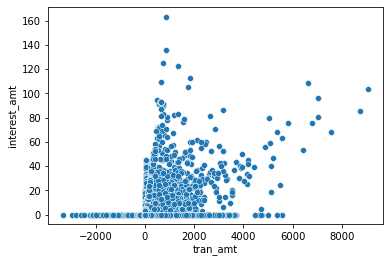

In [152]:
sns.scatterplot(data=merged_df, x="tran_amt", y="interest_amt")

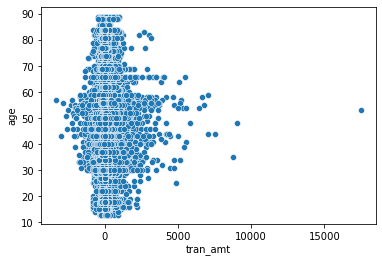

In [128]:
sns.scatterplot(data=merged_df, x="tran_amt", y="age")

In [130]:
merged_df = merged_df.drop(merged_df[(merged_df['tran_amt']>15000) & (merged_df['age']>40)].index)

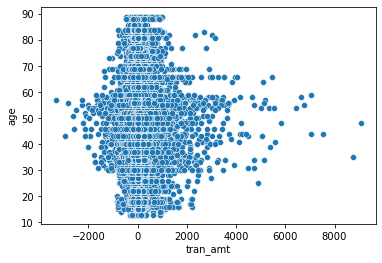

In [131]:
sns.scatterplot(data=merged_df, x="tran_amt", y="age")

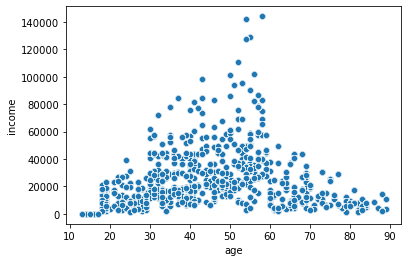

In [133]:
sns.scatterplot(data=merged_df, x="age", y="income")

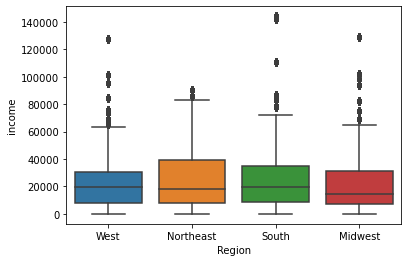

In [126]:
sns.boxplot(x="Region", y = "income", data = merged_df)

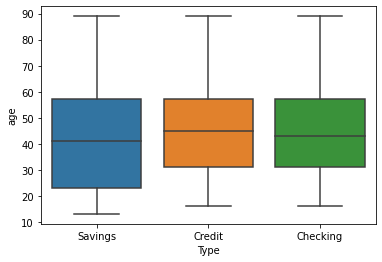

In [146]:
sns.boxplot(x="Type", y = "age", data = merged_df)

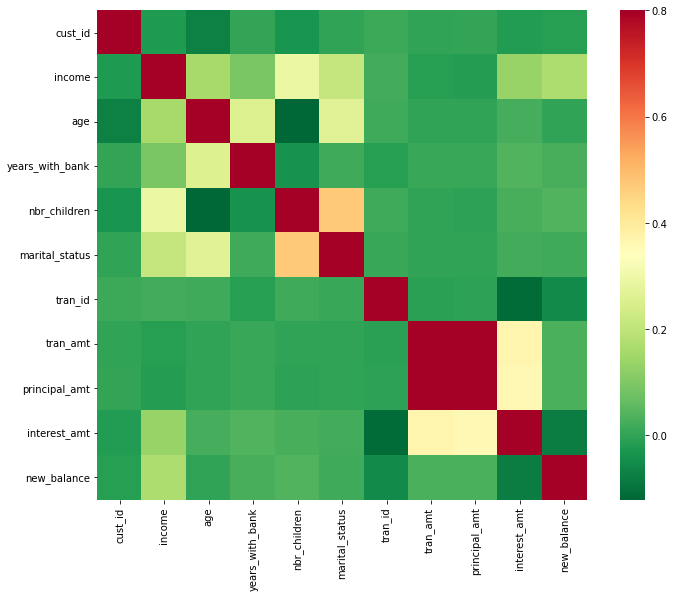

In [145]:
corrmat = merged_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

## Lets Make a Radar Plot

Plot will have labels based on age groups, categories are the Types of Transactions.

Need to find proportion of transactions per age group

In [175]:
(merged_df.groupby('Age_Group').count()/(merged_df['Type']=='Checking').count())*100

cust_id     income  Tier_income2        age  years_with_bank  \
Age_Group                                                                   
10-18      11.482871  11.482871      3.588236  11.482871        11.482871   
19-29      12.408618  12.408618     12.408618  12.408618        12.408618   
30-39      18.049485  18.049485     18.049485  18.049485        18.049485   
40-49      18.084297  18.084297     18.084297  18.084297        18.084297   
50-59      19.064196  19.064196     19.064196  19.064196        19.064196   
60-69      11.919958  11.919958     11.919958  11.919958        11.919958   
70-79       5.190887   5.190887      5.190887   5.190887         5.190887   
80-89       3.799688   3.799688      3.799688   3.799688         3.799688   

           nbr_children     gender  marital_status     Region    tran_id  \
Age_Group                                                                  
10-18         11.482871  11.482871       11.482871  11.482871  11.482871   
19-29         12.408618  12.408618       12.408618  12.408618  12.408618   
30-39         18.049485  18.049485       18.049485  18.049485  18.049485   
40-49         18.084297  18.084297       18.084297  18.084297  18.084297   
50-59         19.064196  19.064196       19.064196  19.064196  19.064196   
60-69         11.919958  11.919958       11.919958  11.919958  11.919958   
70-79          5.190887   5.190887        5.190887   5.190887   5.190887   
80-89          3.799688   3.799688        3.799688   3.799688   3.799688   

            tran_amt  principal_amt  interest_amt  new_balance  tran_date  \
Age_Group                                                                   
10-18      11.482871      11.482871     11.482871    11.482871  11.482871   
19-29      12.408618      12.408618     12.408618    12.408618  12.408618   
30-39      18.049485      18.049485     18.049485    18.049485  18.049485   
40-49      18.084297      18.084297     18.084297    18.084297  18.084297   
50-59      19.064196      19.064196     19.064196    19.064196  19.064196   
60-69      11.919958      11.919958     11.919958    11.919958  11.919958   
70-79       5.190887       5.190887      5.190887     5.190887   5.190887   
80-89       3.799688       3.799688      3.799688     3.799688   3.799688   

                Type  
Age_Group             
10-18      11.482871  
19-29      12.408618  
30-39      18.049485  
40-49      18.084297  
50-59      19.064196  
60-69      11.919958  
70-79       5.190887  
80-89       3.799688

In [185]:
#Create new variable using group by and get value counts for each type
types_per_group = merged_df.groupby('Age_Group')['Type'].value_counts()
#create other varian;e calculting the grouped proportions
pro_age_type = types_per_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pro_age_type

Age_Group  Type    
10-18      Checking    53.346059
           Savings     25.061756
           Credit      21.592185
19-29      Checking    60.681629
           Credit      25.914381
           Savings     13.403990
30-39      Checking    63.090221
           Credit      25.844703
           Savings     11.065076
40-49      Checking    57.985170
           Credit      29.431057
           Savings     12.583773
50-59      Checking    62.085757
           Credit      23.995672
           Savings     13.918572
60-69      Checking    59.048134
           Credit      28.577610
           Savings     12.374256
70-79      Checking    55.091903
           Credit      26.900149
           Savings     18.007948
80-89      Checking    60.773668
           Credit      24.770954
           Savings     14.455378
Name: Type, dtype: float64

In [198]:
lis_types = pro_age_type.tolist()
lis_types[21:24]

[60.77366813708856, 24.770953512046148, 14.455378350865287]

In [199]:
type_trans = ['Checking', 'Savings', 'Credit']
Group1 = lis_types[0:3]
Group2 = lis_types[3:6]
Group3 = lis_types[6:9]
Group4 = lis_types[9:12]
Group5 = lis_types[12:15]
Group6 = lis_types[15:18]
Group7 = lis_types[18:21]
Group8 = lis_types[21:24]

In [207]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=Group1, theta=type_trans, fill='none', name = '10-19'))

fig.add_trace(go.Scatterpolar(r=Group2, theta=type_trans, fill='none', name = '20-29'))

fig.add_trace(go.Scatterpolar(r=Group3, theta=type_trans, fill='none', name = '30-39'))

fig.add_trace(go.Scatterpolar(r=Group4, theta=type_trans, fill='none', name = '40-49'))
fig.add_trace(go.Scatterpolar(r=Group5, theta=type_trans, fill='none', name = '50-59'))
fig.add_trace(go.Scatterpolar(r=Group6, theta=type_trans, fill='none', name = '60-69'))
fig.add_trace(go.Scatterpolar(r=Group7, theta=type_trans, fill='none', name = '70-79'))
fig.add_trace(go.Scatterpolar(r=Group8, theta=type_trans, fill='none', name = '80-89'))


fig.show()

In [229]:
#Create new variable using group by and get value counts for each type
types_per_group = merged_df.groupby('Type')['Age_Group'].value_counts()
#create other varian;e calculting the grouped proportions
pro_age_type = types_per_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pro_age_type

Type      Age_Group
Checking  50-59        19.868410
          30-39        19.115228
          40-49        17.602372
          19-29        12.639598
          60-69        11.814994
          10-18        10.282660
          70-79         4.800450
          80-89         3.876288
Credit    40-49        20.470098
          30-39        17.941089
          50-59        17.593970
          60-69        13.101260
          19-29        12.367351
          10-18         9.535852
          70-79         5.370425
          80-89         3.619954
Savings   10-18        19.948163
          50-59        18.393065
          40-49        15.774421
          30-39        13.843954
          19-29        11.529180
          60-69        10.224327
          70-79         6.479578
          80-89         3.807311
Name: Age_Group, dtype: float64

In [230]:
type_trans = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
Chequing = [10.282660, 12.639598, 19.115228, 17.602372, 
            19.868410, 11.814994, 4.800450, 3.876288]
Savings = [19.948163, 11.529180, 13.843954, 15.774421,
          18.393065, 10.224327, 6.479578, 6.479578]
Credit = [9.535852, 12.367351, 17.941089, 20.470098, 
          17.593970, 13.101260, 5.370425, 3.619954]

In [232]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=Chequing, theta=type_trans, fill='toself', name = 'Chequing'))

fig.add_trace(go.Scatterpolar(r=Savings, theta=type_trans, fill='toself', name = 'Savings'))

fig.add_trace(go.Scatterpolar(r=Credit, theta=type_trans, fill='toself', name = 'Credit'))


fig.show()

## PCA

In [66]:
import copy
pca_df=copy.deepcopy(merged_df)
pca_df.drop('cust_id', axis=1, inplace=True)
pca_df.drop('tran_id', axis=1, inplace=True)
pca_df.drop('tran_date', axis=1, inplace=True)

In [67]:
pca_df.head()

income Tier_income2  age Age_Group  years_with_bank  nbr_children gender  \
0    6605       Lowest   71     70-79                1             0     M    
1    6605       Lowest   71     70-79                1             0     M    
2    6605       Lowest   71     70-79                1             0     M    
3    6605       Lowest   71     70-79                1             0     M    
4    6605       Lowest   71     70-79                1             0     M    

   marital_status Region  tran_amt  principal_amt  interest_amt  new_balance  \
0               2   West   -200.00        -200.00          0.00       511.36   
1               2   West   -204.66        -204.66          0.00       310.54   
2               2   West    -40.00         -40.00          0.00        25.66   
3               2   West      1.92           0.00          1.92       771.36   
4               2   West      1.28           0.00          1.28       513.92   

      Type  day  month  year  
0  Savings    0      2  1995  
1  Savings    5      5  1995  
2  Savings    1      6  1995  
3  Savings    1      1  1995  
4  Savings    4      3  1995

In [68]:
#change age_group, gender, region, type into numerical
#Ordinal Features Version 2 '
pca_df = pca_df.replace({"Tier_income2" : {"Lowest" : 0, "Low Middle" : 1, "High Middle": 2, "Highest": 3},
                             "Age_Group" : {'10-19':0,'20-29':1,'30-39':2,'40-49':3,'50-59':4,
                                            '60-69':5,'70-79':6,'80-89':7},
                             "gender" : {"M " : 0, "F " : 1},
                             "Region" : {"West": 0, "Midwest": 1, "Northeast" : 2, "South": 3},
                        "Type" : {"Checking": 0, "Savings": 1, "Credit" : 2}
                        })

In [69]:
pca_df.head()

income  Tier_income2  age  Age_Group  years_with_bank  nbr_children  \
0    6605           0.0   71          6                1             0   
1    6605           0.0   71          6                1             0   
2    6605           0.0   71          6                1             0   
3    6605           0.0   71          6                1             0   
4    6605           0.0   71          6                1             0   

   gender  marital_status  Region  tran_amt  principal_amt  interest_amt  \
0       0               2       0   -200.00        -200.00          0.00   
1       0               2       0   -204.66        -204.66          0.00   
2       0               2       0    -40.00         -40.00          0.00   
3       0               2       0      1.92           0.00          1.92   
4       0               2       0      1.28           0.00          1.28   

   new_balance  Type  day  month  year  
0       511.36     1    0      2  1995  
1       310.54     1    5      5  1995  
2        25.66     1    1      6  1995  
3       771.36     1    1      1  1995  
4       513.92     1    4      3  1995

In [70]:
#tran_amt and principal amt are same, drop one, also drop interest
pca_df.drop('principal_amt', axis=1, inplace=True)
pca_df.drop('interest_amt', axis=1, inplace=True)

#drop income and others
pca_df.drop('income', axis=1, inplace=True)
pca_df.drop('year', axis=1, inplace=True)
pca_df.drop('month', axis=1, inplace=True)
pca_df.drop('day', axis=1, inplace=True)
pca_df.drop('age',axis=1,inplace=True)
pca_df.head()

Tier_income2  Age_Group  years_with_bank  nbr_children  gender  \
0           0.0          6                1             0       0   
1           0.0          6                1             0       0   
2           0.0          6                1             0       0   
3           0.0          6                1             0       0   
4           0.0          6                1             0       0   

   marital_status  Region  tran_amt  new_balance  Type  
0               2       0   -200.00       511.36     1  
1               2       0   -204.66       310.54     1  
2               2       0    -40.00        25.66     1  
3               2       0      1.92       771.36     1  
4               2       0      1.28       513.92     1

In [71]:
pca_df.isnull().sum()

Tier_income2       6123
Age_Group             0
years_with_bank       0
nbr_children          0
gender                0
marital_status        0
Region                0
tran_amt              0
new_balance           0
Type                  0
dtype: int64

In [72]:
#drop 6000 rows of data NAN values
pca_df=pca_df.dropna(subset=['Tier_income2'])

In [73]:
from sklearn.preprocessing import StandardScaler
df_standard = pd.DataFrame(StandardScaler().fit_transform(pca_df))
df_standard

0         1         2         3         4         5         6  \
0     -1.052576  1.598960 -1.140435 -0.689474 -1.207899 -0.033081 -1.163072   
1     -1.052576  1.598960 -1.140435 -0.689474 -1.207899 -0.033081 -1.163072   
2     -1.052576  1.598960 -1.140435 -0.689474 -1.207899 -0.033081 -1.163072   
3     -1.052576  1.598960 -1.140435 -0.689474 -1.207899 -0.033081 -1.163072   
4     -1.052576  1.598960 -1.140435 -0.689474 -1.207899 -0.033081 -1.163072   
...         ...       ...       ...       ...       ...       ...       ...   
71432  0.175223 -1.811757 -0.388423 -0.689474  0.827884 -1.087622 -1.163072   
71433  0.175223 -1.811757 -0.388423 -0.689474  0.827884 -1.087622 -1.163072   
71434  0.175223 -1.811757 -0.388423 -0.689474  0.827884 -1.087622 -1.163072   
71435  0.175223 -1.811757 -0.388423 -0.689474  0.827884 -1.087622 -1.163072   
71436  0.175223 -1.811757 -0.388423 -0.689474  0.827884 -1.087622 -1.163072   

              7         8         9  
0     -0.596631 -0.030036  0.389359  
1     -0.611144 -0.120158  0.389359  
2     -0.098333 -0.248003  0.389359  
3      0.032221  0.086644  0.389359  
4      0.030228 -0.028887  0.389359  
...         ...       ...       ...  
71432 -0.579222  0.325035 -0.761433  
71433 -0.137044  1.148002 -0.761433  
71434  0.026242  0.699223 -0.761433  
71435  0.080432 -0.251396 -0.761433  
71436  0.005811  0.010658 -0.761433  

[71437 rows x 10 columns]

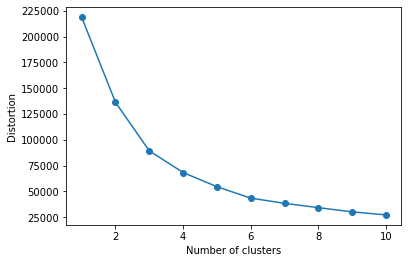

In [78]:
mat = prin_trans[['princom1', 'princom2']].values
plot_distortion(mat, max_clusters=10)

In [76]:
#define function to make distortion plot - pulled from Walkthrough
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_standard)

#create new data frame
prin_trans =pd.DataFrame(data = pca_fit, columns = ['princom1', 'princom2'])
prin_trans

princom1  princom2
0     -0.748991 -0.140873
1     -0.774330 -0.198837
2     -0.810074 -0.280003
3     -0.715956 -0.064613
4     -0.748432 -0.138887
...         ...       ...
71432 -0.588279  1.134516
71433 -0.356775  1.664445
71434 -0.482866  1.376270
71435 -0.750066  0.765267
71436 -0.676431  0.933582

[71437 rows x 2 columns]

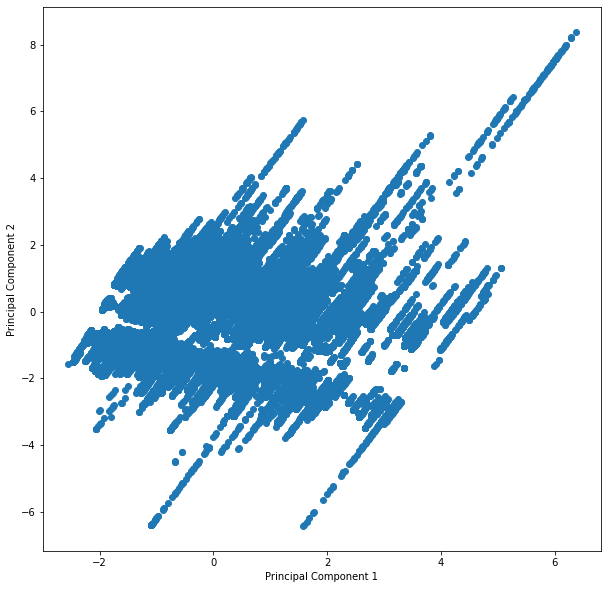

In [75]:
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(prin_trans['princom1'],
                prin_trans['princom2'])

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

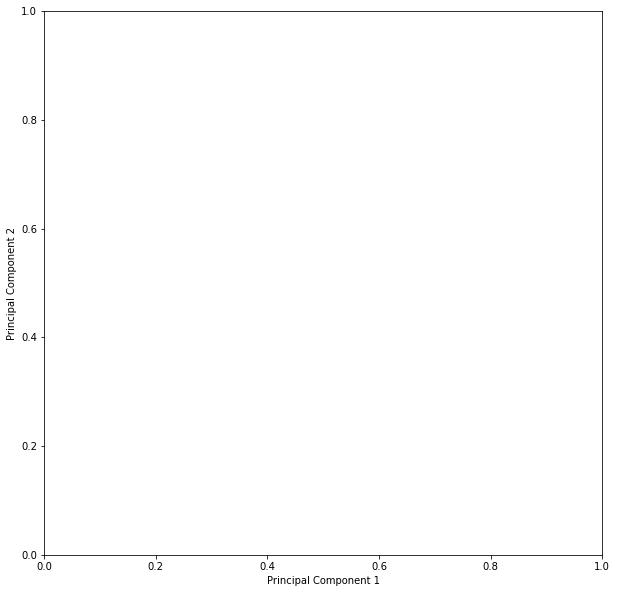

In [64]:
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
targets = [0,1,2]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['Type'] == target
    plt.scatter(prin_trans.loc[indicesToKeep, 'princom1'],
                prin_trans.loc[indicesToKeep, 'princom2'],
                c = color, s = 50)

plt.legend(targets)

In [312]:
#dataframe exluding tier_income
pca_df2=copy.deepcopy(pca_df)
pca_df2.drop('Tier_income2', axis=1, inplace=True)